In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from numpy.linalg import lstsq
import scipy.optimize as opt
from tqdm.notebook import tqdm

sns.set(color_codes=True)
mpl.rcParams['figure.dpi'] = 120

In [7]:
df1 = pd.read_csv('Канал 1_500nm_2mm.csv', delimiter=';')
df1.columns = ['мВ', 'мА']
df1_1 = df1[1:24]
df1_2 = df1[25:174]
df1_3 = df1[175:200]
df2 = pd.read_csv('Канал 2_500nm_2mm.csv', delimiter=';')
df2.columns = ['мВ', 'мА']
df2_1 = df2[1:24]
df2_2 = df2[25:174]
df2_3 = df2[175:200]

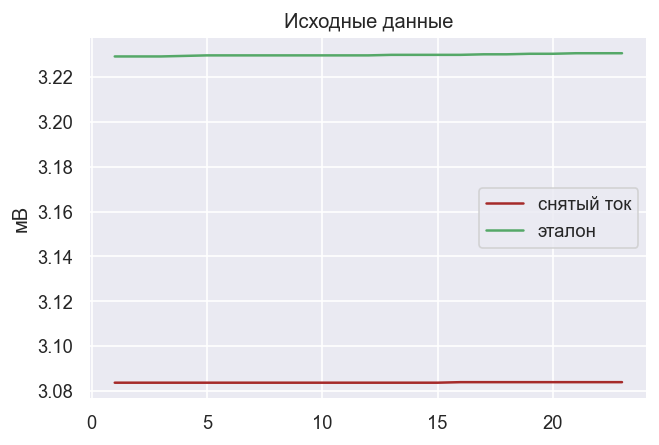

In [8]:
plt.title('Исходные данные')

plt.plot(df1_1['мВ'], label='снятый ток', color='brown')
plt.plot(df2_1['мВ'], label='эталон', color='g')
plt.legend()
plt.ylabel('мВ')
plt.show()

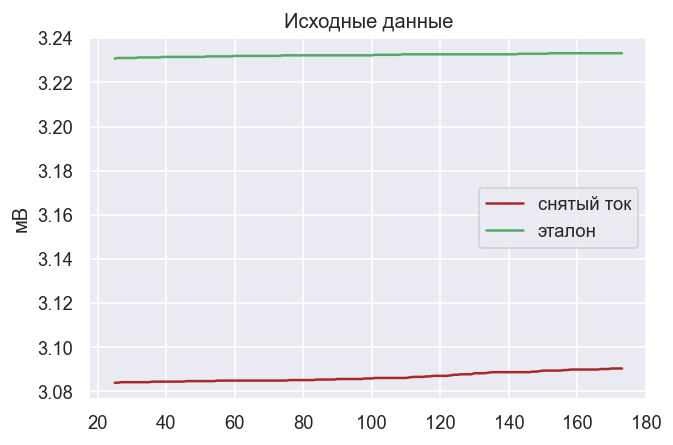

In [9]:
plt.title('Исходные данные')

plt.plot(df1_2['мВ'], label='снятый ток', color='brown')
plt.plot(df2_2['мВ'], label='эталон', color='g')
plt.legend()
plt.ylabel('мВ')
plt.show()

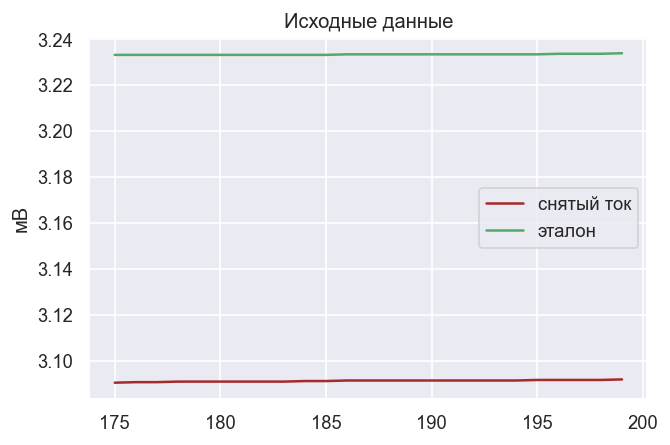

In [10]:
plt.title('Исходные данные')

plt.plot(df1_3['мВ'], label='снятый ток', color='brown')
plt.plot(df2_3['мВ'], label='эталон', color='g')
plt.legend()
plt.ylabel('мВ')
plt.show()

In [11]:
eps = 1e-4

In [12]:
df1_1['infV'] = df1_1['мВ'] - eps
df1_1['supV'] = df1_1['мВ'] + eps

df1_2['infV'] = df1_2['мВ'] - eps
df1_2['supV'] = df1_2['мВ'] + eps

df1_3['infV'] = df1_3['мВ'] - eps
df1_3['supV'] = df1_3['мВ'] + eps


df2_1['infV'] = df2_1['мВ'] - eps
df2_1['supV'] = df2_1['мВ'] + eps

df2_2['infV'] = df2_2['мВ'] - eps
df2_2['supV'] = df2_2['мВ'] + eps

df2_3['infV'] = df2_3['мВ'] - eps
df2_3['supV'] = df2_3['мВ'] + eps

C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\1967189138.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1['infV'] = df1_1['мВ'] - eps
C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\1967189138.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1['supV'] = df1_1['мВ'] + eps
C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\1967189138.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

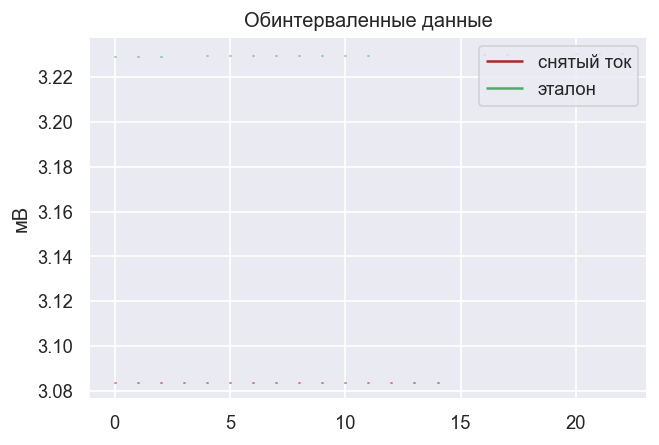

In [13]:
plt.title('Обинтерваленные данные')

plt.vlines(np.arange(len(df1_1)), df1_1['infV'], df1_1['supV'], label='снятый ток', colors='brown')
plt.vlines(np.arange(len(df2_1)), df2_1['infV'], df2_1['supV'], label='эталон', colors='g')

plt.legend()
plt.ylabel('мВ')

plt.show()

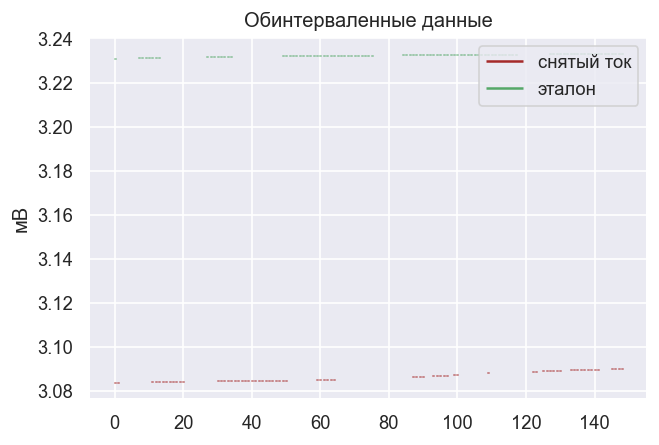

In [14]:
plt.title('Обинтерваленные данные')

plt.vlines(np.arange(len(df1_2)), df1_2['infV'], df1_2['supV'], label='снятый ток', colors='brown')
plt.vlines(np.arange(len(df2_2)), df2_2['infV'], df2_2['supV'], label='эталон', colors='g')

plt.legend()
plt.ylabel('мВ')

plt.show()

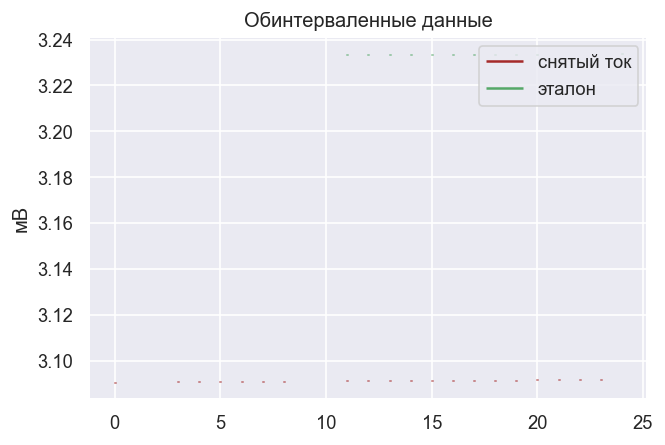

In [15]:
plt.title('Обинтерваленные данные')

plt.vlines(np.arange(len(df1_3)), df1_3['infV'], df1_3['supV'], label='снятый ток', colors='brown')
plt.vlines(np.arange(len(df2_3)), df2_3['infV'], df2_3['supV'], label='эталон', colors='g')

plt.legend()
plt.ylabel('мВ')

plt.show()

In [17]:
x1 = np.arange(len(df1_1))
A1 = np.vstack([x1, np.ones(len(x1))]).T

x2 = np.arange(len(df1_2))
A2 = np.vstack([x2, np.ones(len(x2))]).T

x3 = np.arange(len(df1_3))
A3 = np.vstack([x3, np.ones(len(x3))]).T

In [19]:
sol1_1 = lstsq(A1, df1_1['мВ'])[0]
sol2_1 = lstsq(A1, df2_1['мВ'])[0]

mnk1_1 = sol1_1[0] * x1 + sol1_1[1]
mnk2_1 = sol2_1[0] * x1 + sol2_1[1]


sol1_2 = lstsq(A2, df1_2['мВ'])[0]
sol2_2 = lstsq(A2, df2_2['мВ'])[0]

mnk1_2 = sol1_2[0] * x2 + sol1_2[1]
mnk2_2 = sol2_2[0] * x2 + sol2_2[1]

sol1_3 = lstsq(A3, df1_3['мВ'])[0]
sol2_3 = lstsq(A3, df2_3['мВ'])[0]

mnk1_3 = sol1_3[0] * x3 + sol1_3[1]
mnk2_3 = sol2_3[0] * x3 + sol2_3[1]

C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\545087583.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol1_1 = lstsq(A1, df1_1['мВ'])[0]
C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\545087583.py:2: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  sol2_1 = lstsq(A1, df2_1['мВ'])[0]
C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\545087583.py:8: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the futur

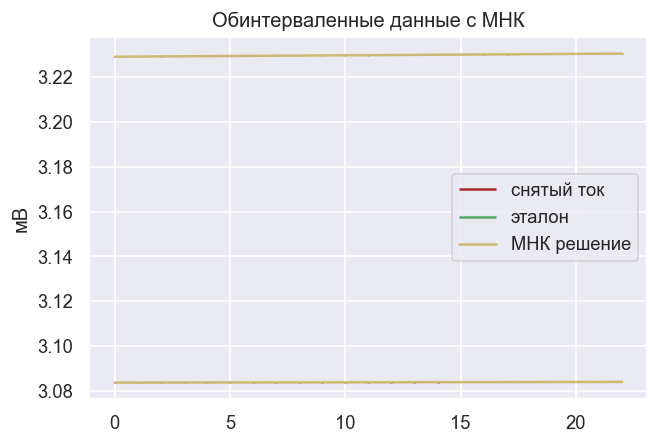

In [20]:
plt.title('Обинтерваленные данные с МНК')

plt.vlines(np.arange(len(df1_1)), df1_1['infV'], df1_1['supV'], label='снятый ток', colors='brown')
plt.plot(x1, mnk1_1, c='y')

plt.vlines(np.arange(len(df2_1)), df2_1['infV'], df2_1['supV'], label='эталон', colors='g')
plt.plot(x1, mnk2_1, c='y' ,label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

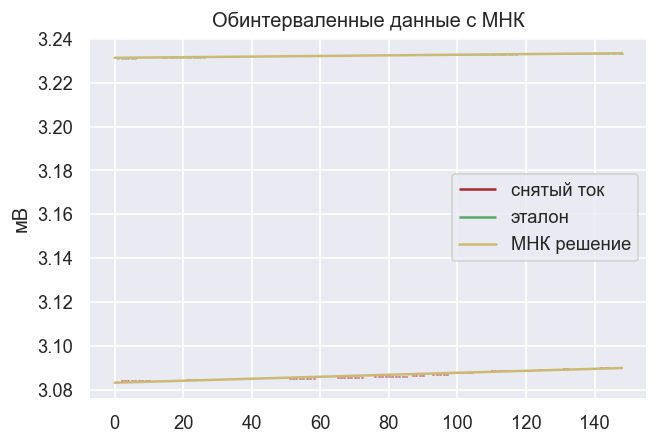

In [21]:
plt.title('Обинтерваленные данные с МНК')

plt.vlines(np.arange(len(df1_2)), df1_2['infV'], df1_2['supV'], label='снятый ток', colors='brown')
plt.plot(x2, mnk1_2, c='y')

plt.vlines(np.arange(len(df2_2)), df2_2['infV'], df2_2['supV'], label='эталон', colors='g')
plt.plot(x2, mnk2_2, c='y' ,label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

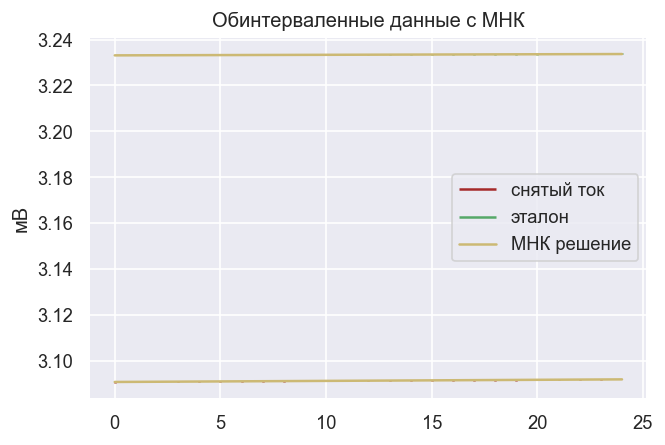

In [22]:
plt.title('Обинтерваленные данные с МНК')

plt.vlines(np.arange(len(df1_3)), df1_3['infV'], df1_3['supV'], label='снятый ток', colors='brown')
plt.plot(x3, mnk1_3, c='y')

plt.vlines(np.arange(len(df2_3)), df2_3['infV'], df2_3['supV'], label='эталон', colors='g')
plt.plot(x3, mnk2_3, c='y' ,label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

In [23]:
w1_1 = []
for pred, tg in zip(mnk1_1, df1_1['мВ']):
    w1_1.append(max(abs(pred-tg) / eps, 1))
w1_1 = np.array(w1_1)

w2_1 = []
for pred, tg in zip(mnk2_1, df2_1['мВ']):
    w2_1.append(max(abs(pred-tg) / eps, 1))
w2_1 = np.array(w2_1)


w1_2 = []
for pred, tg in zip(mnk1_2, df1_2['мВ']):
    w1_2.append(max(abs(pred-tg) / eps, 1))
w1_2 = np.array(w1_2)

w2_2 = []
for pred, tg in zip(mnk2_2, df2_2['мВ']):
    w2_2.append(max(abs(pred-tg) / eps, 1))
w2_2 = np.array(w2_2)


w1_3 = []
for pred, tg in zip(mnk1_3, df1_3['мВ']):
    w1_3.append(max(abs(pred-tg) / eps, 1))
w1_3 = np.array(w1_3)

w2_3 = []
for pred, tg in zip(mnk2_3, df2_3['мВ']):
    w2_3.append(max(abs(pred-tg) / eps, 1))
w2_3 = np.array(w2_3)

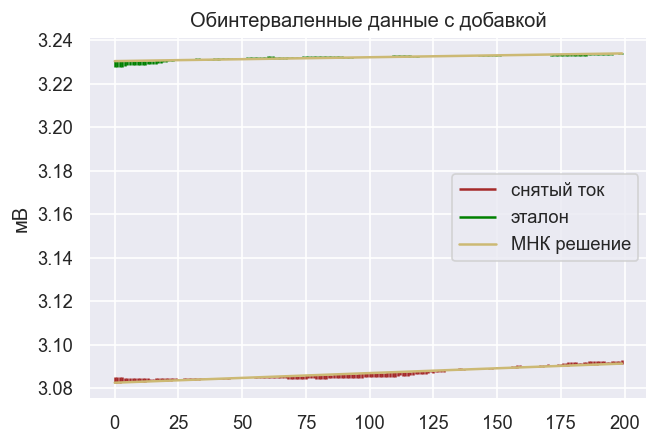

In [104]:
plt.title('Обинтерваленные данные с добавкой')

plt.vlines(x, df1['мВ']-[i*eps for i in w1], df1['мВ']+[i*eps for i in w1], label='снятый ток', colors='brown')
plt.plot(x, mnk1, c='y')

plt.vlines(x, df2['мВ']-[i*eps for i in w2], df2['мВ']+[i*eps for i in w2], label='эталон', colors='green')
plt.plot(x, mnk2, c='y',label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

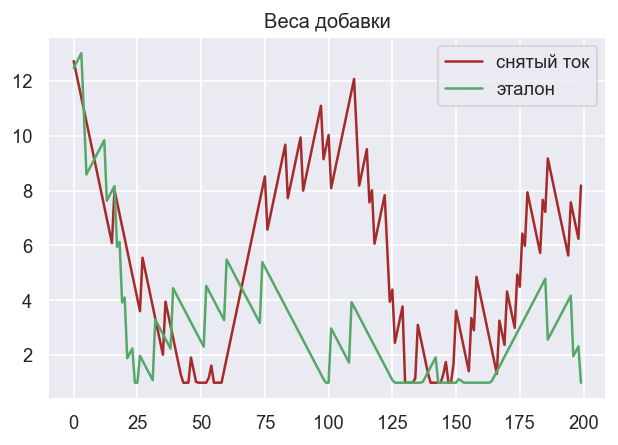

In [105]:
plt.title('Веса добавки')
plt.plot(w1, label='снятый ток', color='brown')
plt.plot(w2, label='эталон', color='g')
plt.legend()

plt.show()

In [24]:
new_rad1_1 = max(w1_1) * eps
new_rad2_1 = max(w2_1) * eps

new_rad1_2 = max(w1_2) * eps
new_rad2_2 = max(w2_2) * eps

new_rad1_3 = max(w1_3) * eps
new_rad2_3 = max(w2_3) * eps

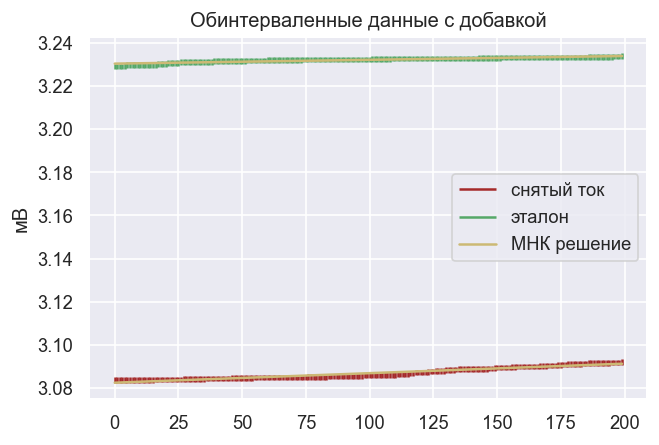

In [107]:
plt.title('Обинтерваленные данные с добавкой')

plt.vlines(x, df1['мВ']-new_rad1, df1['мВ']+new_rad1, label='снятый ток', colors='brown')
plt.plot(x, mnk1, c='y')

plt.vlines(x, df2['мВ']-new_rad2, df2['мВ']+new_rad2, label='эталон', colors='g')
plt.plot(x, mnk2, c='y',label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

In [31]:
def get_info(data, rad, x):
    bt = []
    for b in tqdm(np.arange(data[0] - rad, data[0] + rad, 1e-6)):
        for i in range(1, len(data)):
            k = (data[i] - rad - b) / i
            y = b + k * x
            if ((data - rad) <= y).all() and ((data + rad) >= y).all():
                bt.append([b, k])

            k = (data[i] + rad - b) / i
            y = b + k * x
            if ((data - rad) <= y).all() and ((data + rad) >= y).all():
                bt.append([b, k])
    bt = np.array(bt)
    
    btdf = pd.DataFrame(bt).groupby(0).agg(list).reset_index()
    b0 = btdf[0].tolist()
    b0 = b0 + b0[::-1]
    b1 = np.array(btdf[1].tolist())
    b1 = list(b1.max(axis=1)) + list(b1.min(axis=1))[::-1]
    
    x_ptp = bt[:, 0].max() - bt[:, 0].min()
    y_ptp = bt[:, 1].max() - bt[:, 1].min()
    
    plt.title('Информационное множество')
    plt.xlim(bt[:, 0].min() - x_ptp * 0.1, bt[:, 0].max() + x_ptp * 0.1)
    plt.ylim(bt[:, 1].min() - y_ptp * 0.1, bt[:, 1].max() + y_ptp * 0.1)
    axes = plt.gca()

    axes.add_patch(mpl.patches.Polygon(np.array([b0, b1]).T, color='y'))

    axes.add_patch(mpl.patches.Polygon(
        [(bt[:, 0].min(), bt[:, 1].min()),
         (bt[:, 0].min(), bt[:, 1].max()),
         (bt[:, 0].max(), bt[:, 1].max()),
         (bt[:, 0].max(), bt[:, 1].min())], 
        color='r', 
        fill=False
    ))

    plt.xlabel('\u03B20')
    plt.ylabel('\u03B21')
    plt.show()
    
    bbox = []
    for i in x:
        bbox.append([row[0] + i * row[1] for row in bt])

    bbox = np.array(bbox)
    
    plt.title('Диаграмма рассеяния и коридор совместности')
    plt.vlines(x, data-rad, data+rad, label='снятый ток', colors='brown')

    axes = plt.gca()

    axes.add_patch(mpl.patches.Polygon(np.array([list(x) + list(x[::-1]), list(bbox.max(axis=1)) + list(bbox.min(axis=1)[::-1])]).T,
                                              color='y',
                                              alpha=0.5,
                                              zorder=3))
    
    return bt

  0%|          | 0/251 [00:00<?, ?it/s]

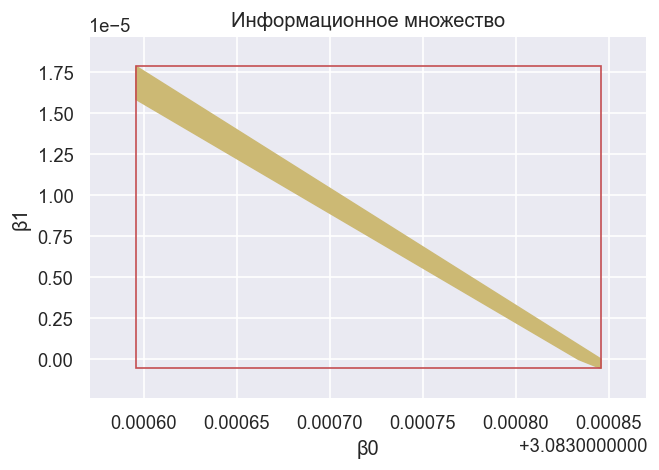

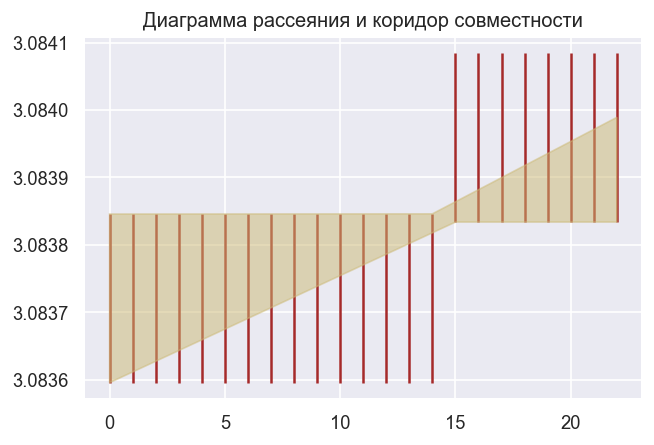

In [32]:
bt1_1 = get_info(df1_1['мВ'].tolist(), new_rad1_1, x1)

  0%|          | 0/1915 [00:00<?, ?it/s]

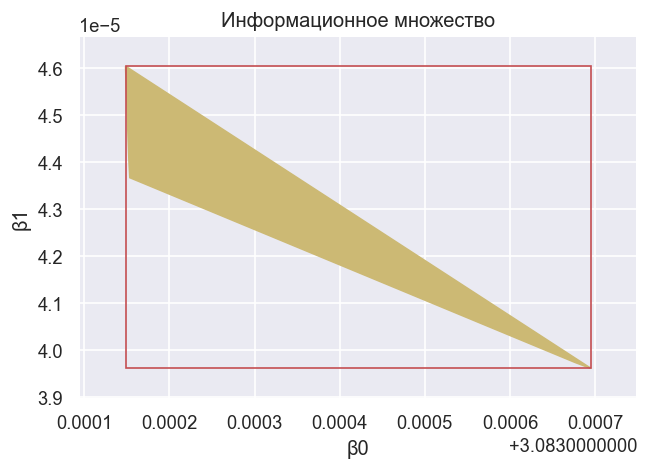

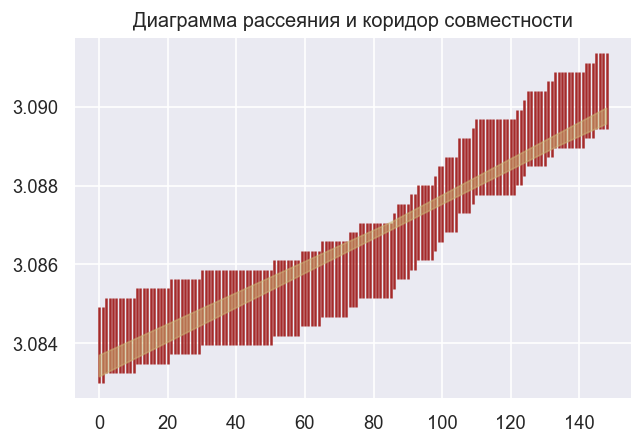

In [35]:
bt1_2 = get_info(df1_2['мВ'].tolist(), new_rad1_2, x2)

  0%|          | 0/438 [00:00<?, ?it/s]

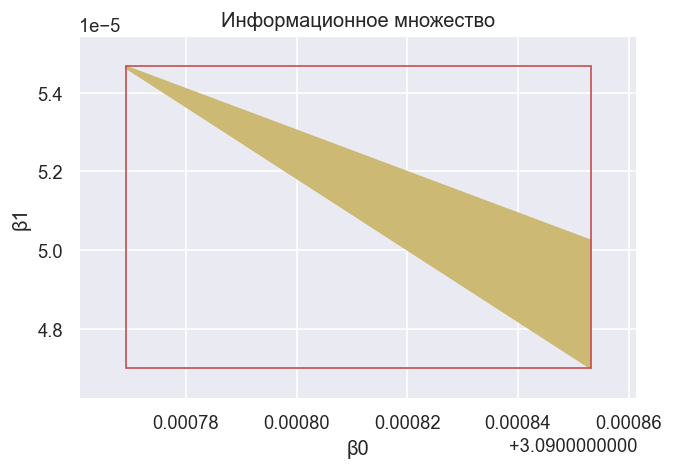

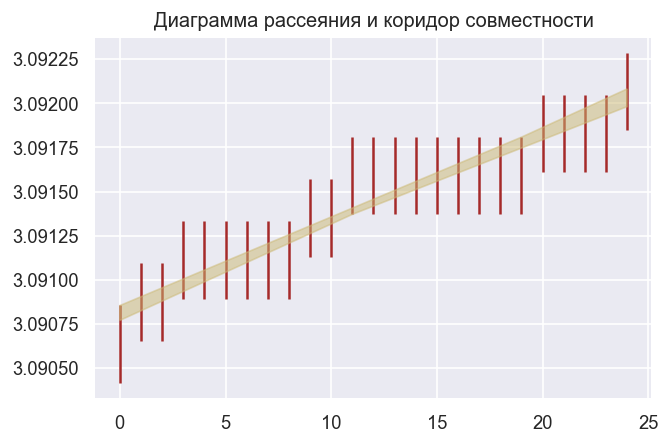

In [36]:
bt1_3 = get_info(df1_3['мВ'].tolist(), new_rad1_3, x3)

  0%|          | 0/481 [00:00<?, ?it/s]

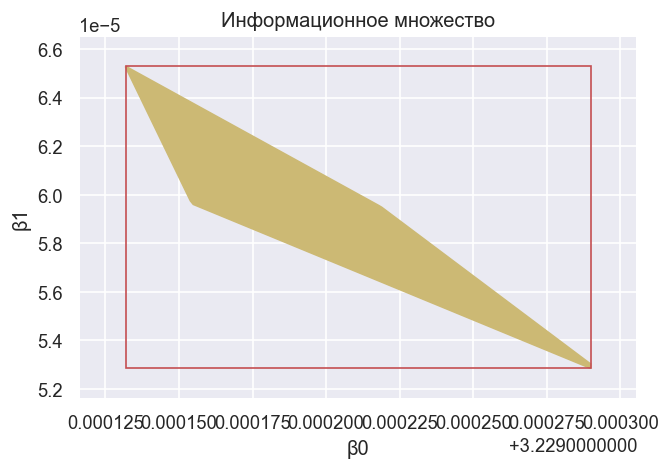

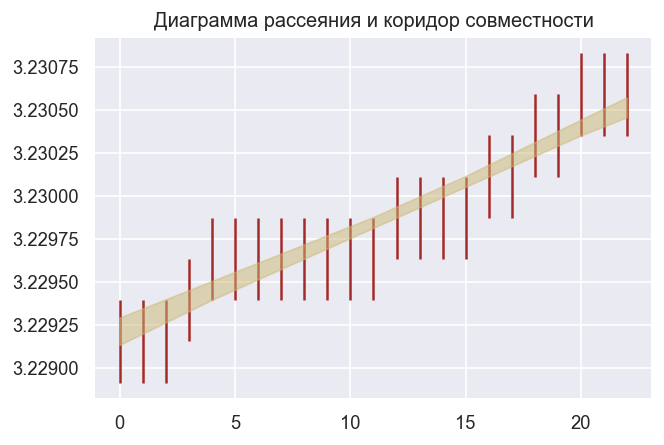

In [37]:
bt2_1 = get_info(df2_1['мВ'].tolist(), new_rad2_1, x1)

  0%|          | 0/956 [00:00<?, ?it/s]

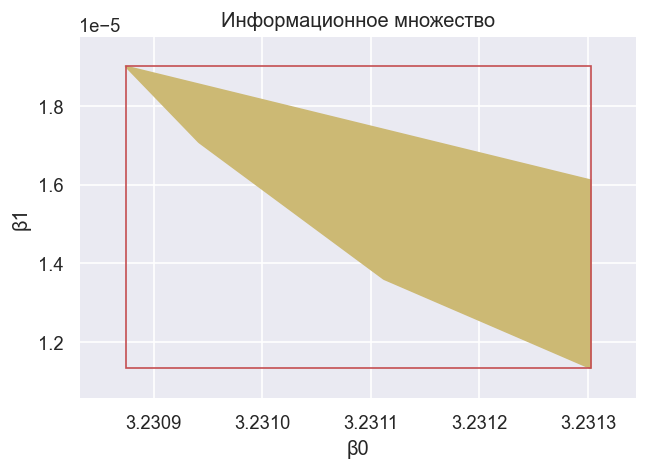

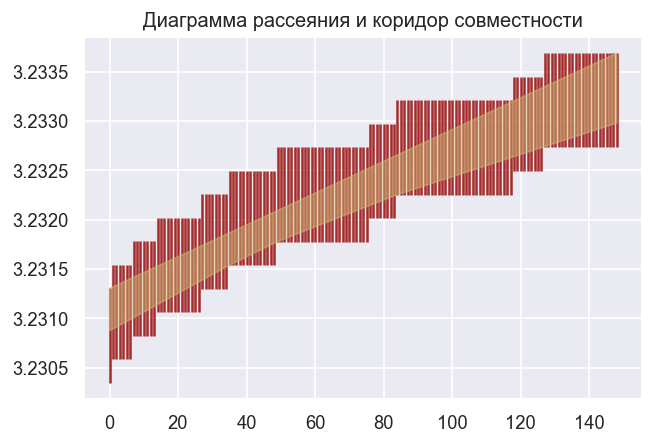

In [38]:
bt2_2 = get_info(df2_2['мВ'].tolist(), new_rad2_2, x2)

  0%|          | 0/492 [00:00<?, ?it/s]

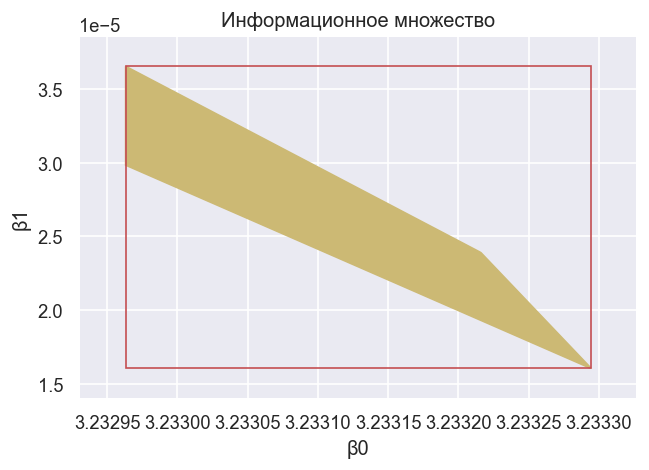

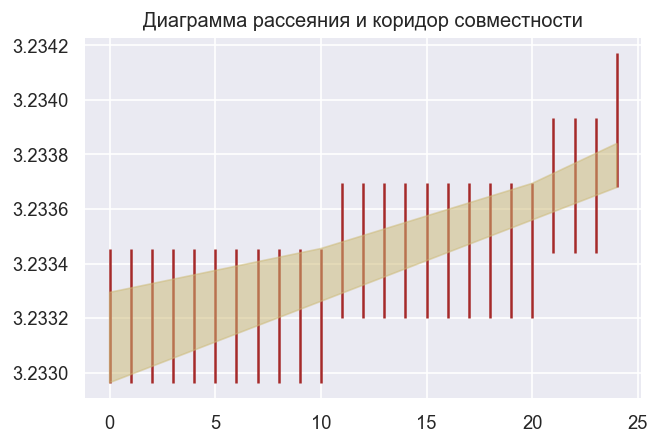

In [39]:
bt2_3 = get_info(df2_3['мВ'].tolist(), new_rad2_3, x3)

In [43]:
def plot_predict(df, rad, bt, x, lag=20):
    bbox = []
    for i in x:
        bbox.append([row[0] + i * row[1] for row in bt])

    bbox = np.array(bbox)
    
    d_max_otr = bbox.max(axis=1)[1] - bbox.max(axis=1)[0]
    d_max_pos = bbox.max(axis=1)[-1] - bbox.max(axis=1)[-2]
    d_min_otr = bbox.min(axis=1)[1] - bbox.min(axis=1)[0]
    d_min_pos = bbox.min(axis=1)[-1] - bbox.min(axis=1)[-2]

    x_otr = []
    y_otr = []
    for i, j in enumerate(np.arange(0, -lag, -1)):
        x_otr.append(j)
        y_otr.append(bbox.max(axis=1)[0] - d_max_otr*i)

    for i, j in enumerate(np.arange(-(lag-1), 1)):
        x_otr.append(j)
        y_otr.append(bbox.min(axis=1)[0] - d_min_otr*(lag-i))

    x_pos = []
    y_pos = []
    for i, j in enumerate(np.arange(len(df), len(df)+lag)):
        x_pos.append(j)
        y_pos.append(bbox.max(axis=1)[-1] + d_max_pos*i)

    for i, j in enumerate(np.arange(len(df)+lag-1, len(df)-1, -1)):
        x_pos.append(j)
        y_pos.append(bbox.min(axis=1)[-1] + d_min_pos*(lag-i))
        
    plt.title('Диаграмма рассеяния и коридор совместности внутри и вне интервала имеющихся данных')
    plt.vlines(x, df['мВ']-rad, df['мВ']+rad, label='снятый ток', colors='brown')

    axes = plt.gca()

    axes.add_patch(mpl.patches.Polygon(np.array([list(x) + list(x[::-1]), list(bbox.max(axis=1)) + list(bbox.min(axis=1)[::-1])]).T,
                                              color='y',
                                              alpha=0.5,
                                              zorder=3))

    axes.add_patch(mpl.patches.Polygon(np.array([list(x) + list(x[::-1]), list(bbox.max(axis=1)) + list(bbox.min(axis=1)[::-1])]).T,
                                              color='y',
                                              alpha=0.5,
                                              zorder=3))

    axes.add_patch(mpl.patches.Polygon(np.array([x_otr, y_otr]).T,
                                              color='r',
                                              alpha=0.5,
                                              zorder=3))

    axes.add_patch(mpl.patches.Polygon(np.array([x_pos, y_pos]).T,
                                              color='r',
                                              alpha=0.5,
                                              zorder=3))

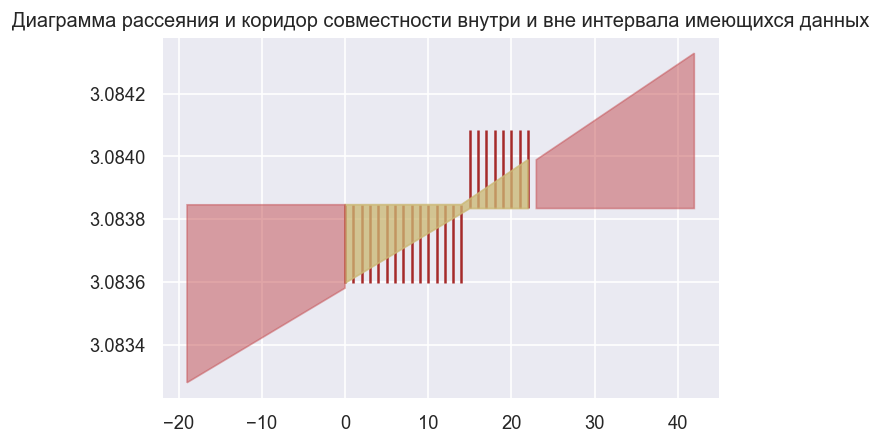

In [44]:
plot_predict(df1_1, new_rad1_1, bt1_1, x1)

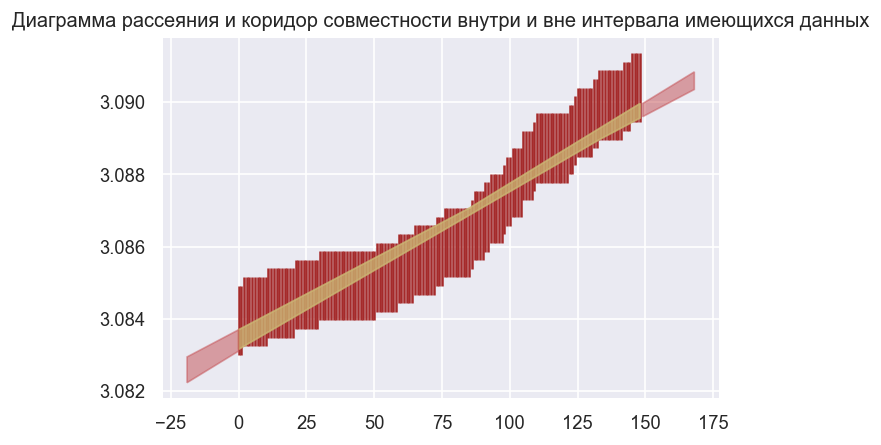

In [45]:
plot_predict(df1_2, new_rad1_2, bt1_2, x2)

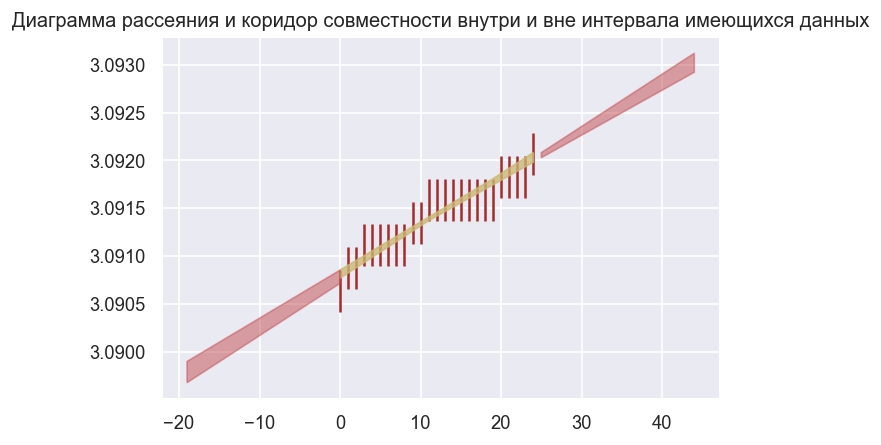

In [46]:
plot_predict(df1_3, new_rad1_3, bt1_3, x3)

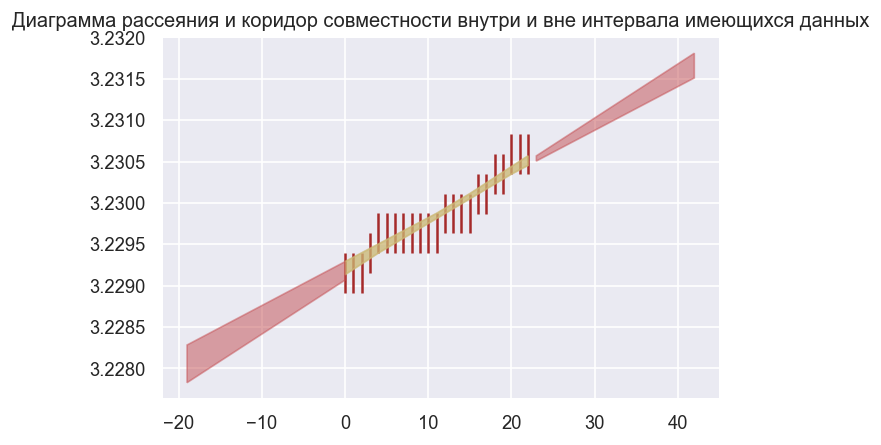

In [47]:
plot_predict(df2_1, new_rad2_1, bt2_1, x1)

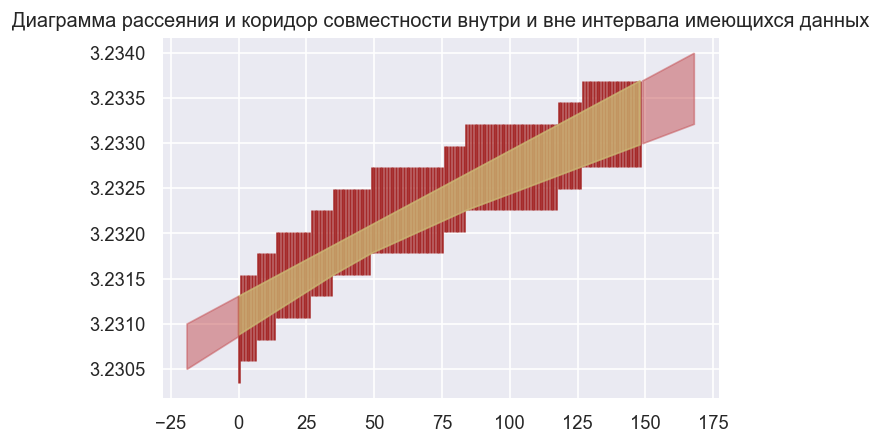

In [48]:
plot_predict(df2_2, new_rad2_2, bt2_2, x2)

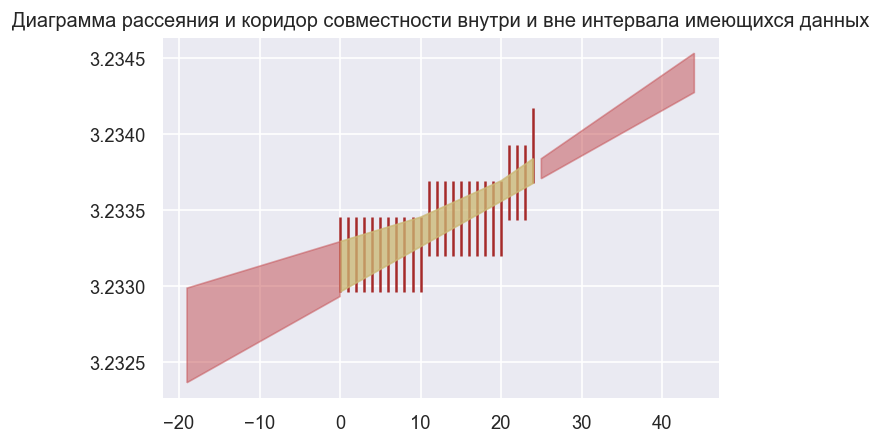

In [49]:
plot_predict(df2_3, new_rad2_3, bt2_3, x3)

In [51]:
h_mnk1_1 = mnk1_1 - sol1_1[1]
h_mnk2_1 = mnk2_1 - sol2_1[1]

h_mnk1_2 = mnk1_2 - sol1_2[1]
h_mnk2_2 = mnk2_2 - sol2_2[1]

h_mnk1_3 = mnk1_3 - sol1_3[1]
h_mnk2_3 = mnk2_3 - sol2_3[1]

In [52]:
df1_1['infI'] = df1_1['мВ'] - new_rad1_1 - h_mnk1_1
df1_1['supI'] = df1_1['мВ'] + new_rad1_1 - h_mnk1_1

df2_1['infI'] = df2_1['мВ'] - new_rad2_1 - h_mnk2_1
df2_1['supI'] = df2_1['мВ'] + new_rad2_1 - h_mnk2_1


df1_2['infI'] = df1_2['мВ'] - new_rad1_2 - h_mnk1_2
df1_2['supI'] = df1_2['мВ'] + new_rad1_2 - h_mnk1_2

df2_2['infI'] = df2_2['мВ'] - new_rad2_2 - h_mnk2_2
df2_2['supI'] = df2_2['мВ'] + new_rad2_2 - h_mnk2_2


df1_3['infI'] = df1_3['мВ'] - new_rad1_3 - h_mnk1_3
df1_3['supI'] = df1_3['мВ'] + new_rad1_3 - h_mnk1_3

df2_3['infI'] = df2_3['мВ'] - new_rad2_3 - h_mnk2_3
df2_3['supI'] = df2_3['мВ'] + new_rad2_3 - h_mnk2_3

C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\2350153649.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1['infI'] = df1_1['мВ'] - new_rad1_1 - h_mnk1_1
C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\2350153649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1_1['supI'] = df1_1['мВ'] + new_rad1_1 - h_mnk1_1
C:\Users\rafan\AppData\Local\Temp\ipykernel_15152\2350153649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

  0%|          | 0/251 [00:00<?, ?it/s]

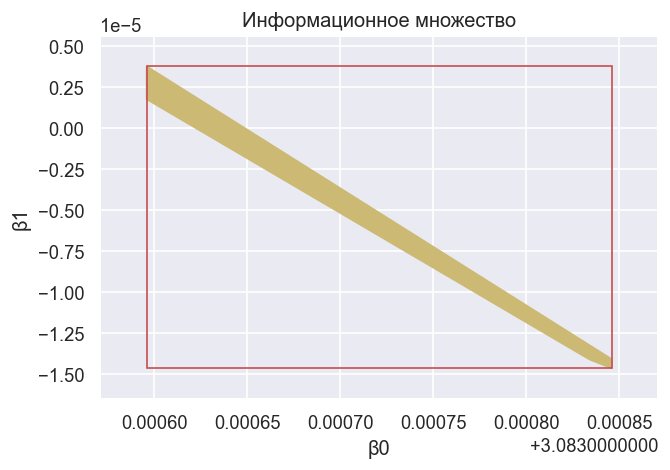

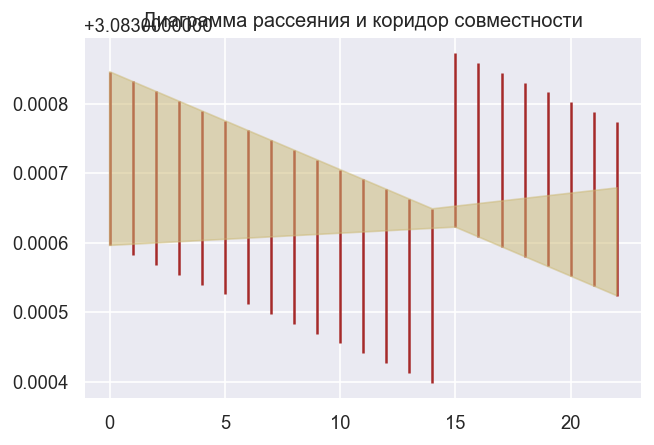

In [53]:
get_info((df1_1['мВ']- h_mnk1_1).tolist(), new_rad1_1, x1);

  0%|          | 0/1915 [00:00<?, ?it/s]

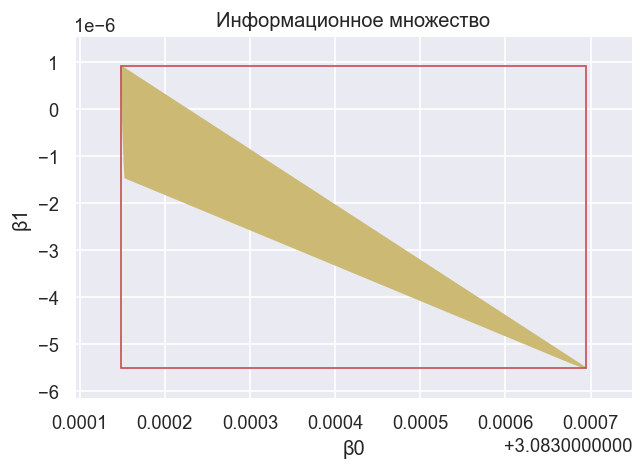

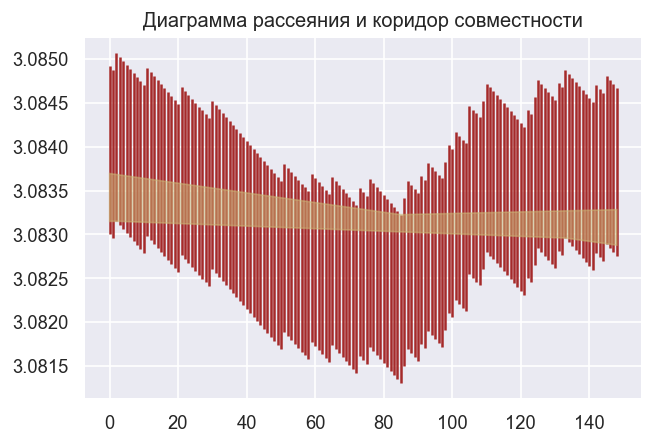

In [54]:
get_info((df1_2['мВ']- h_mnk1_2).tolist(), new_rad1_2, x2);

  0%|          | 0/438 [00:00<?, ?it/s]

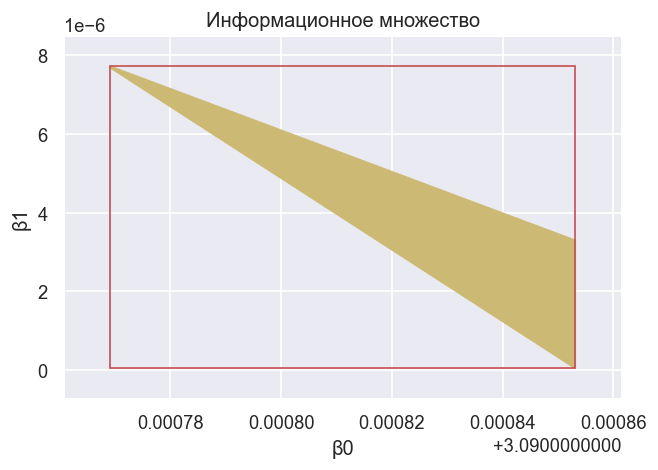

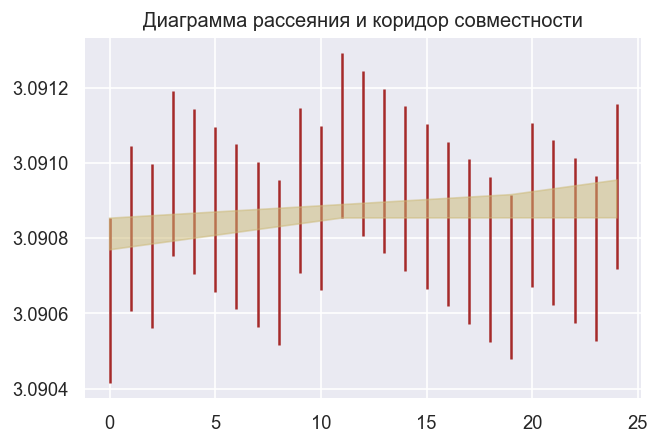

In [55]:
get_info((df1_3['мВ']- h_mnk1_3).tolist(), new_rad1_3, x3);

  0%|          | 0/481 [00:00<?, ?it/s]

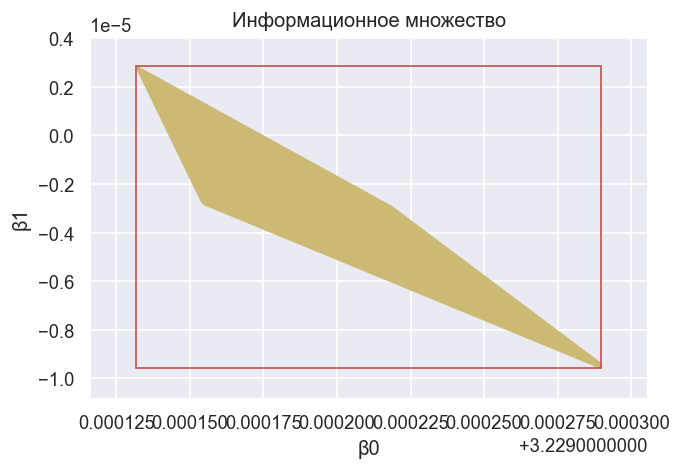

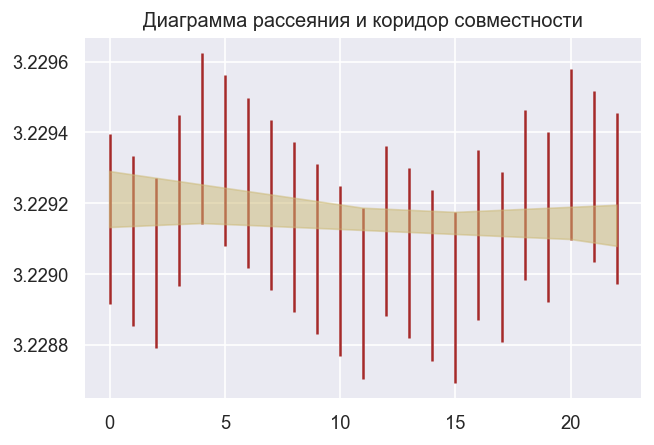

In [57]:
get_info((df2_1['мВ']- h_mnk2_1).tolist(), new_rad2_1, x1);

  0%|          | 0/956 [00:00<?, ?it/s]

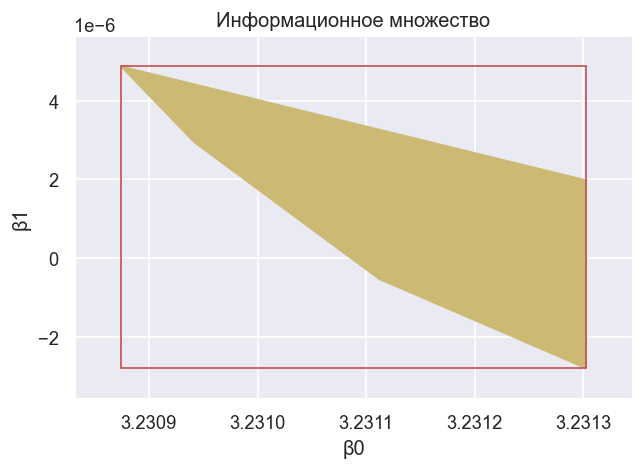

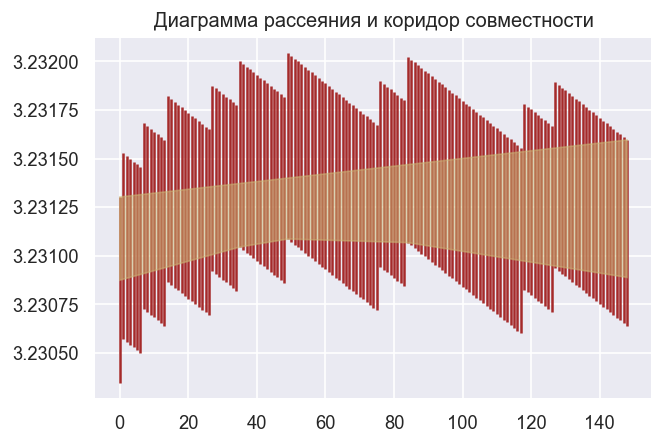

In [58]:
get_info((df2_2['мВ']- h_mnk2_2).tolist(), new_rad2_2, x2);

  0%|          | 0/492 [00:00<?, ?it/s]

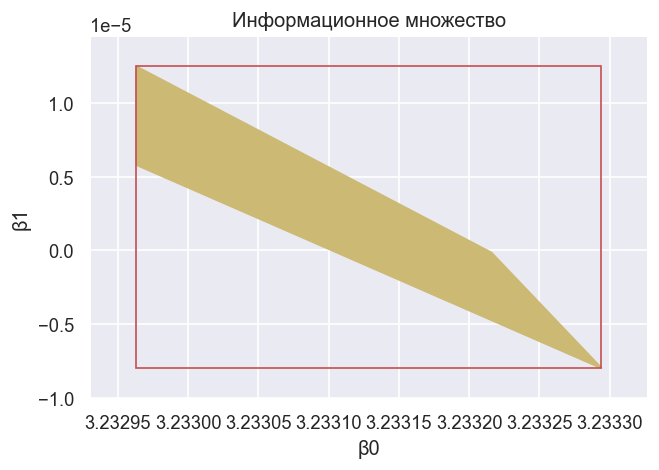

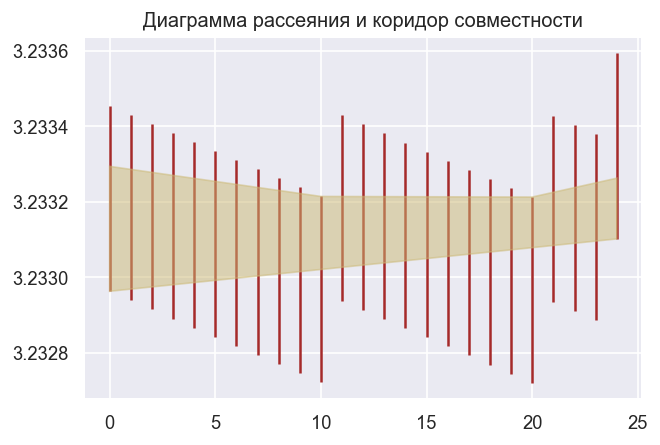

In [59]:
get_info((df2_3['мВ']- h_mnk2_3).tolist(), new_rad2_3, x3);

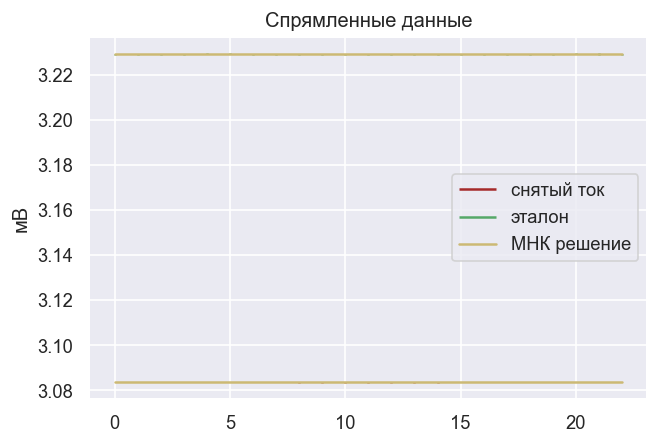

In [60]:
plt.title('Спрямленные данные')

plt.vlines(x1, df1_1['infI'], df1_1['supI'], label='снятый ток', colors='brown')
plt.plot(x1, [sol1_1[1] for _ in x1], c='y')

plt.vlines(x1, df2_1['infI'], df2_1['supI'], label='эталон', colors='g')
plt.plot(x1, [sol2_1[1] for _ in x1], c='y', label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

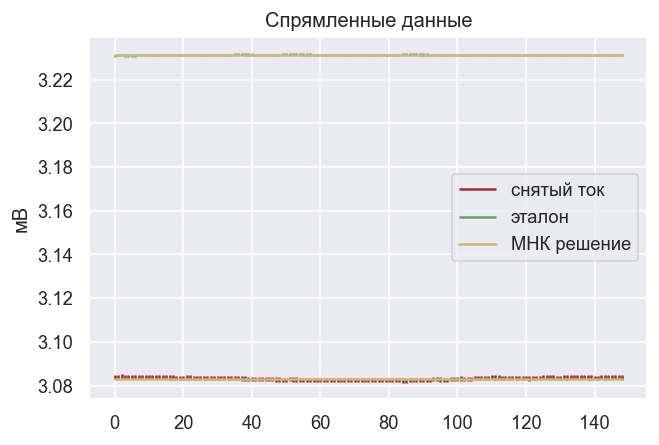

In [61]:
plt.title('Спрямленные данные')

plt.vlines(x2, df1_2['infI'], df1_2['supI'], label='снятый ток', colors='brown')
plt.plot(x2, [sol1_2[1] for _ in x2], c='y')

plt.vlines(x2, df2_2['infI'], df2_2['supI'], label='эталон', colors='g')
plt.plot(x2, [sol2_2[1] for _ in x2], c='y', label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

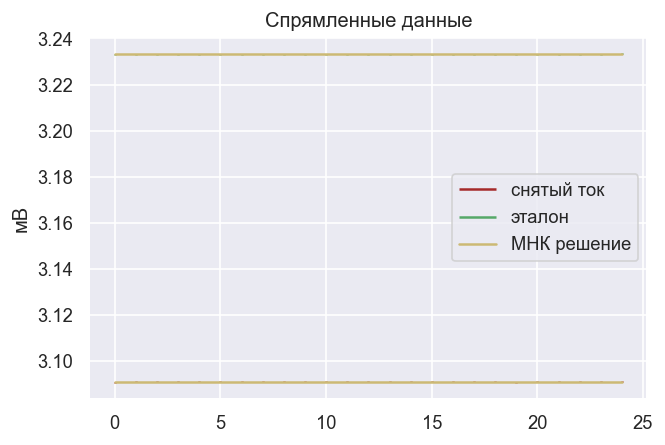

In [62]:
plt.title('Спрямленные данные')

plt.vlines(x3, df1_3['infI'], df1_3['supI'], label='снятый ток', colors='brown')
plt.plot(x3, [sol1_3[1] for _ in x3], c='y')

plt.vlines(x3, df2_3['infI'], df2_3['supI'], label='эталон', colors='g')
plt.plot(x3, [sol2_3[1] for _ in x3], c='y', label='МНК решение')

plt.ylabel('мВ')
plt.legend()

plt.show()

In [119]:
def JK(R):
    sup2 = df2['supI'].tolist()
    inf2 = df2['infI'].tolist()
    
    sup1 = (df1['supI'] * R).tolist()
    inf1 = (df1['infI'] * R).tolist()
    
    nom = min(min(sup1), min(sup2)) - max(max(inf1), max(inf2))
    denom = max(max(sup1), max(sup2)) - min(min(inf1), min(inf2))
    
    return nom / denom

In [63]:
def JK1(R):
    sup2 = df2_1['supI'].tolist()
    inf2 = df2_1['infI'].tolist()
    
    sup1 = (df1_1['supI'] * R).tolist()
    inf1 = (df1_1['infI'] * R).tolist()
    
    nom = min(min(sup1), min(sup2)) - max(max(inf1), max(inf2))
    denom = max(max(sup1), max(sup2)) - min(min(inf1), min(inf2))
    
    return nom / denom

def JK2(R):
    sup2 = df2_2['supI'].tolist()
    inf2 = df2_2['infI'].tolist()
    
    sup1 = (df1_2['supI'] * R).tolist()
    inf1 = (df1_2['infI'] * R).tolist()
    
    nom = min(min(sup1), min(sup2)) - max(max(inf1), max(inf2))
    denom = max(max(sup1), max(sup2)) - min(min(inf1), min(inf2))
    
    return nom / denom

def JK3(R):
    sup2 = df2_3['supI'].tolist()
    inf2 = df2_3['infI'].tolist()
    
    sup1 = (df1_3['supI'] * R).tolist()
    inf1 = (df1_3['infI'] * R).tolist()
    
    nom = min(min(sup1), min(sup2)) - max(max(inf1), max(inf2))
    denom = max(max(sup1), max(sup2)) - min(min(inf1), min(inf2))
    
    return nom / denom

In [64]:
jk1 = []
jk2 = []
jk3 = []
r = np.arange(1, 1.3001, .0001)
for i in r:
    jk1.append(JK1(i))
    jk2.append(JK2(i))
    jk3.append(JK3(i))
    
res1 = opt.fmin(lambda x: -JK1(x), 1)[0]
res2 = opt.fmin(lambda x: -JK2(x), 1)[0]
res3 = opt.fmin(lambda x: -JK3(x), 1)[0]

Optimization terminated successfully.
         Current function value: -0.029688
         Iterations: 17
         Function evaluations: 34
Optimization terminated successfully.
         Current function value: -0.020056
         Iterations: 12
         Function evaluations: 24
Optimization terminated successfully.
         Current function value: -0.000251
         Iterations: 13
         Function evaluations: 26


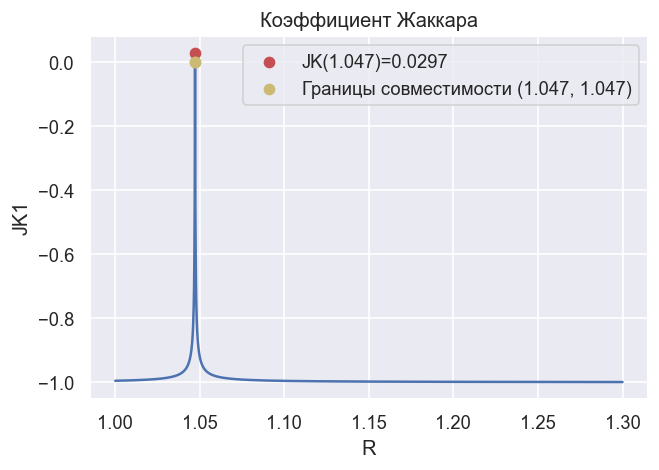

In [67]:
plt.title('Коэффициент Жаккара')
plt.plot(r, jk1)
plt.scatter([res1], 
            [JK1(res1)], 
            c='r', 
            label='JK('+'{:.3f}'.format(res1)+')=' +'{:.4f}'.format(JK1(res1)),
            zorder=3
           )


root1 = res1
root2 = res1

plt.scatter([root1, root1], 
            [0, 0], 
            c='y', 
            label='Границы совместимости ('+'{:.3f}'.format(root1)+', '+'{:.3f}'.format(root1)+')',
            zorder=3
           )


plt.xlabel('R')
plt.ylabel('JK1')
plt.legend()

plt.show()

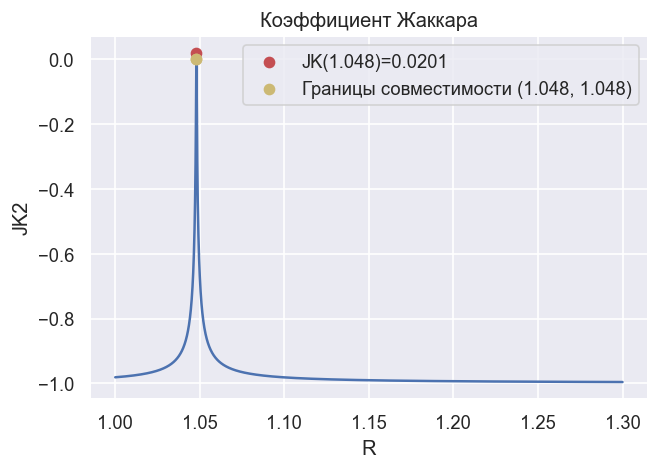

In [68]:
plt.title('Коэффициент Жаккара')
plt.plot(r, jk2)
plt.scatter([res2], 
            [JK2(res2)], 
            c='r', 
            label='JK('+'{:.3f}'.format(res2)+')=' +'{:.4f}'.format(JK2(res2)),
            zorder=3
           )


root1 = res2
root2 = res2

plt.scatter([root1, root1], 
            [0, 0], 
            c='y', 
            label='Границы совместимости ('+'{:.3f}'.format(root1)+', '+'{:.3f}'.format(root2)+')',
            zorder=3
           )


plt.xlabel('R')
plt.ylabel('JK2')
plt.legend()

plt.show()

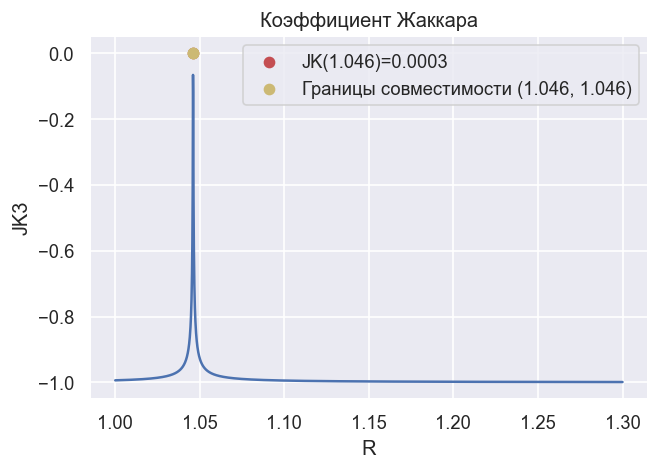

In [69]:
plt.title('Коэффициент Жаккара')
plt.plot(r, jk3)
plt.scatter([res3], 
            [JK3(res3)], 
            c='r', 
            label='JK('+'{:.3f}'.format(res3)+')=' +'{:.4f}'.format(JK3(res3)),
            zorder=3
           )


root1 = res3
root2 = res3

plt.scatter([root1, root2], 
            [0, 0], 
            c='y', 
            label='Границы совместимости ('+'{:.3f}'.format(root1)+', '+'{:.3f}'.format(root2)+')',
            zorder=3
           )


plt.xlabel('R')
plt.ylabel('JK3')
plt.legend()

plt.show()